In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
#we wont use Position column here as level column is sufficient
x = dataset.iloc[:, 1:2].values #always take x as matrix
y = dataset.iloc[:, 2].values

#### we will consider whole dataset as input as data is too small to split and also we need precision here.

In [4]:
#fitting linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
#fitting plynomial regression. 
#we tried for degree 2,3,4 and found 4 to be best of them
from sklearn.preprocessing import PolynomialFeatures
polyreg= PolynomialFeatures(degree = 4)
x_poly = polyreg.fit_transform(x)
lreg2 = LinearRegression()
lreg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

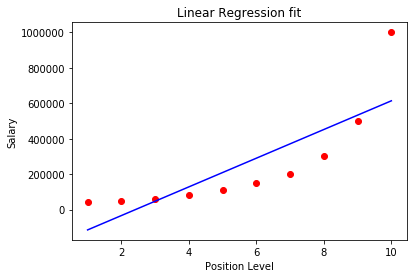

In [6]:
#Visualizing linear regression
plt.scatter(x,y, color='red')
plt.plot(x, lreg.predict(x), color='blue')
plt.title("Linear Regression fit")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

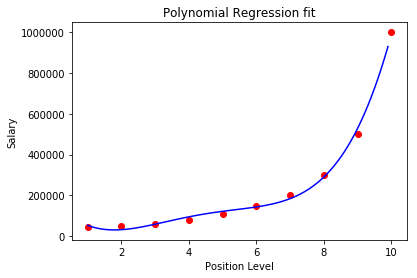

In [7]:
#Visualizing Polynomial regression (with smoother curve)
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y, color='red')
plt.plot(x_grid, lreg2.predict(polyreg.fit_transform(x_grid)), color='blue')
plt.title("Polynomial Regression fit")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Predicting Salary for position level 6.5

In [8]:
#Linear Regression
lreg.predict(6.5)

array([330378.78787879])

In [9]:
#Polynomial Regression
lreg2.predict(polyreg.fit_transform(6.5))

array([158862.45265153])

#### We get a huge difference!